<a href="https://colab.research.google.com/github/divyaranwka-rgb/Lung-Cancer-Detection-model/blob/main/lungCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI can be used to address three fundamental challenges as far as cancer diagnosis and treatment is concerned:


1.   Increasing accessibility
2.   Increasing affordability
3.   Can AI catch what doctors miss





In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, roc_curve

In [32]:
url = "https://raw.githubusercontent.com/divyaranwka-rgb/Lung-Cancer-Detection-model/main/datasetLungCancer.csv"

df = pd.read_csv(url)

In [33]:
df.shape

(310, 16)

In [34]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [35]:
# Transforming binary cols to (0,1) from (1,2)
binary_cols = [col for col in df.columns if col not in ['GENDER', 'AGE', 'LUNG_CANCER']]

for col in binary_cols:
    df[col] = df[col].map({1: 0, 2: 1})

# Convert the last column from (YES, NO) to (1, 0)
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# Convert gender from (M, F) to (0, 1)
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})


df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [36]:
X = df.drop('LUNG_CANCER',axis=1)
Y = df['LUNG_CANCER']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state= 5)

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

From the confusion matrix `cm = [[TN, FP], [FN, TP]]`:

We can define the following metrics:

*   **Accuracy:** The proportion of correctly classified instances out of the total instances.
    *   Formula: `(TP + TN) / (TP + TN + FP + FN)`

*   **Precision:** The proportion of positive identifications that were actually correct. It tells us, when the model predicts positive, how often is it correct?
    *   Formula: `TP / (TP + FP)`

*   **Recall (Sensitivity):** The proportion of actual positive cases that were correctly identified. It tells us, of all the actual positive cases, how many did the model catch?
    *   Formula: `TP / (TP + FN)`

*   **Specificity:** The proportion of actual negative cases that were correctly identified. It tells us, of all the actual negative cases, how many did the model catch?
    *   Formula: `TN / (TN + FP)`

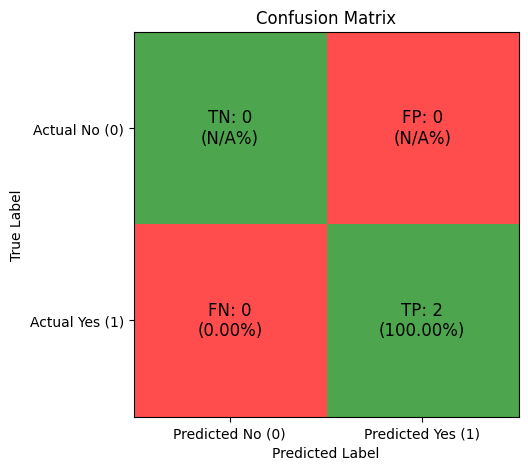

In [38]:
y_pred = model.predict(x_test)
cm=confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plotting
# Handle potential division by zero if a row sum is 0
cm_sum_axis_1 = cm.sum(axis=1)
cm_normalized = np.zeros_like(cm, dtype=float)
for i in range(cm.shape[0]):
    if cm_sum_axis_1[i] != 0:
        cm_normalized[i, :] = cm[i, :] / cm_sum_axis_1[i]
    else:
        cm_normalized[i, :] = np.nan # Or 0, depending on desired behavior for empty actual classes

# Create a custom colormap: red for 0, green for 1
cmap_custom = ListedColormap(['red', 'green'])

# Create a 2x2 matrix to represent the desired colors for the background
# 1 for green (TN, TP), 0 for red (FP, FN)
color_indicator_matrix = np.array(
    [[1, 0],  # TN (0,0) is green (1), FP (0,1) is red (0)
     [0, 1]]   # FN (1,0) is red (0), TP (1,1) is green (1)
)

plt.figure(figsize=(6, 5))
ax = plt.gca() # Get current axes

# Use extent to align the imshow cells with matplotlib's default integer ticks (0, 1)
ax.imshow(color_indicator_matrix, cmap=cmap_custom, alpha=0.7) # alpha for softer colors

# Define the text labels for the cells, including counts and percentages
cell_texts = [
    [f'TN: {cm[0, 0]}\n({cm_normalized[0, 0]*100:.2f}%)' if not np.isnan(cm_normalized[0,0]) else f'TN: {cm[0, 0]}\n(N/A%)', f'FP: {cm[0, 1]}\n({cm_normalized[0, 1]*100:.2f}%)' if not np.isnan(cm_normalized[0,1]) else f'FP: {cm[0, 1]}\n(N/A%)'],
    [f'FN: {cm[1, 0]}\n({cm_normalized[1, 0]*100:.2f}%)' if not np.isnan(cm_normalized[1,0]) else f'FN: {cm[1, 0]}\n(N/A%)', f'TP: {cm[1, 1]}\n({cm_normalized[1, 1]*100:.2f}%)' if not np.isnan(cm_normalized[1,1]) else f'TP: {cm[1, 1]}\n(N/A%)']
]

# Add the text annotations on top of the colored background
for i in range(2):
    for j in range(2):
        ax.text(j, i, cell_texts[i][j],
                ha='center', va='center', color='black', fontsize=12)

# Set ticks and labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Predicted No (0)', 'Predicted Yes (1)'])
ax.set_yticklabels(['Actual No (0)', 'Actual Yes (1)'])

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')
plt.show()

In [39]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
Specificity: nan


/tmp/ipython-input-849057413.py:9: RuntimeWarning: invalid value encountered in scalar divide
  specificity = TN / (TN + FP)
